# Waivers and Exceptions Data:

### Importing necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
import os
import requests
import zipfile as zp
from io import BytesIO

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

#Modelling
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import RepeatedStratifiedKFold

### Reading the file with appropriate schema

In [ ]:
# Define data types for pandas
dtypes = {
    'Fiscal year': 'int',
    'Funding Agency Name': 'str',
    'Funding Agency ID': 'str',
    'Justification': 'str',
    'Country of Product or Service Origin': 'str',
    'Product or Code': 'str',
    'Product or Service Description': 'str',
    'Vendor Name':'str',
    'Vendor Address City':'str',
    'Vendor Address State Name':'str',
    'Vendor Address Country Name':'str',
    'Total Contract Value': 'float',
    'PIID': 'str',
    'Date Signed': 'str',
    'Completion Date': 'str',
    'NAICS Code': 'str',
    'NAICS Description': 'str',
    'Type of Contract (Desc)':'str',
    'Award or IDV Type':'str',
    'Approved/Denied':'int'
}
dtypes1 = {
    'Fiscal year': 'int',
    'Funding Agency Name': 'str',
    'Funding Agency ID': 'str',
    'Justification': 'str',
    'Country of Product or Service Origin': 'str',
    'Product or Code': 'str',
    'Product or Service Description': 'str',
    'Vendor Name':'str',
    'Vendor Address City':'str',
    'Vendor Address State Name':'str',
    'Vendor Address Country Name':'str',
    'Total Contract Value': 'str',
    'PIID': 'str',
    'Date Signed': 'str',
    'Completion Date': 'str',
    'NAICS Code': 'str',
    'NAICS Description': 'str',
    'Type of Contract (Desc)':'str',
    'Award or IDV Type':'str',
    'Approved/Denied':'int'
}

In [ ]:
df_list=[]

In [ ]:
df = pd.read_excel('Mayuri.xlsx', dtype=dtypes1)

# Replace empty strings with np.nan
# Replace empty strings with NaN

In [ ]:
df['Total Contract Value'].replace(' ', np.nan, inplace=True)
df['Total Contract Value'].replace('10.800.00', '10.800', inplace=True)

# Now convert the column to float
df['Total Contract Value'] = df['Total Contract Value'].astype(float)
df_list.append(df)

In [ ]:
df=pd.read_excel('Mansi.xlsx',dtype=dtypes)
df_list.append(df)

In [ ]:
df=pd.read_excel('Olivia.xlsx',dtype=dtypes)
df_list.append(df)

In [ ]:
# Concatenate all dataframes in df_list
df_combined = pd.concat(df_list)

# Now df_combined has the combined data of all three Excel files

In [ ]:
# Read CSV with specified dtypes
df = df_combined  #pd.read_csv(f'Buy American Act Exceptions and Waivers June 2023-2.csv', dtype=dtypes)

### Getting statistics from the data, analyzing outliers and values in different columns of interest.

In [ ]:
df.head()

,Fiscal Year,Funding Agency Name,Funding Agency ID,Justification,Country of Product or Service Origin,Product or Service Code,Product or Service Code Description,Vendor Name,Vendor Address City,Vendor Address State Name,Vendor Address Country Name,Total Contract Value,PIID,Date Signed,Completion Date,NAICS Code,NAICS Description,Type of Contract (Desc),Award or IDV Type,Approved(1)/Denied(0)
0,2022,ADMINISTRATION FOR CHILDREN AND FAMILIES,7590,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,TAIWAN,7B21,IT AND TELECOM - COMPUTE: MAINFRAME (HARDWARE ...,"AGSI, LLC",LOVETTSVILLE,VIRGINIA,UNITED STATES,32995.00,75ACF122F80026,9-16-2022,11-30-2022,811212,COMPUTER AND OFFICE MACHINE REPAIR AND MAINTEN...,FIRM FIXED PRICE,DELIVERY ORDER,1
1,2020,ADMINISTRATION FOR CHILDREN AND FAMILIES,7590,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,GERMANY,6640,LABORATORY EQUIPMENT AND SUPPLIES,"CARL ZEISS MICROSCOPY, LLC",WHITE PLAINS,NEW YORK,UNITED STATES,278917.44,75N91020P00420,8-26-2020,2020-01-09 00:00:00,334516,ANALYTICAL LABORATORY INSTRUMENT MANUFACTURING,FIRM FIXED PRICE,PURCHASE ORDER,1
2,2023,AGENCY FOR INTERNATIONAL DEVELOPMENT,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,5975,ELECTRICAL HARDWARE AND SUPPLIES,"INTELLECTECHS, INC.",VIRGINIA BEACH,VIRGINIA,UNITED STATES,11081.25,72030623P00002,2023-11-03 00:00:00,07-31-2023,339940,OFFICE SUPPLIES (EXCEPT PAPER) MANUFACTURING,FIRM FIXED PRICE,PURCHASE ORDER,1
3,2023,AGENCY FOR INTERNATIONAL DEVELOPMENT,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,5975,ELECTRICAL HARDWARE AND SUPPLIES,"INTELLECTECHS, INC.",VIRGINIA BEACH,VIRGINIA,UNITED STATES,955.00,72030623P00002,3-31-2023,07-31-2023,339940,OFFICE SUPPLIES (EXCEPT PAPER) MANUFACTURING,FIRM FIXED PRICE,PURCHASE ORDER,1
4,2018,AGENCY FOR INTERNATIONAL DEVELOPMENT,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,ARMENIA,7030,INFORMATION TECHNOLOGY SOFTWARE,PRIOTIX LLC,YEREVAN,NaN,ARMENIA,0.00,72011118P00001,9-26-2018,12-27-2018,511210,SOFTWARE PUBLISHERS,FIRM FIXED PRICE,PURCHASE ORDER,1


In [ ]:
df.describe()

,Fiscal Year,Total Contract Value,Approved(1)/Denied(0)
count,340075.000000,3.400410e+05,340075.000000
mean,2020.269999,1.051042e+05,0.999979
std,1.200191,4.384335e+06,0.004537
min,2001.000000,-4.387921e+08,0.000000
25%,2019.000000,9.495000e+01,1.000000
50%,2020.000000,8.202000e+02,1.000000
75%,2021.000000,7.987320e+03,1.000000
max,2023.000000,1.337500e+09,1.000000


In [ ]:
# Convert date columns to datetime
df['Date Signed'] = pd.to_datetime(df['Date Signed'])
df['Completion Date'] = pd.to_datetime(df['Completion Date'])

In [ ]:
print(df.dtypes)

Fiscal Year                                      int64
Funding Agency Name                             object
Funding Agency ID                               object
Justification                                   object
Country of Product or Service Origin            object
Product or Service Code                         object
Product or Service Code Description             object
Vendor Name                                     object
Vendor Address City                             object
Vendor Address State Name                       object
Vendor Address Country Name                     object
Total Contract Value                           float64
PIID                                            object
Date Signed                             datetime64[ns]
Completion Date                         datetime64[ns]
NAICS Code                                      object
NAICS Description                               object
Type of Contract (Desc)                         object
Award or I

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340075 entries, 0 to 23208
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Fiscal Year                           340075 non-null  int64         
 1   Funding Agency Name                   340075 non-null  object        
 2   Funding Agency ID                     339259 non-null  object        
 3   Justification                         340075 non-null  object        
 4   Country of Product or Service Origin  340018 non-null  object        
 5   Product or Service Code               339977 non-null  object        
 6   Product or Service Code Description   340024 non-null  object        
 7   Vendor Name                           339961 non-null  object        
 8   Vendor Address City                   339964 non-null  object        
 9   Vendor Address State Name             213666 non-null  objec

In [ ]:
df.describe(include='all')

,Fiscal Year,Funding Agency Name,Funding Agency ID,Justification,Country of Product or Service Origin,Product or Service Code,Product or Service Code Description,Vendor Name,Vendor Address City,Vendor Address State Name,Vendor Address Country Name,Total Contract Value,PIID,Date Signed,Completion Date,NAICS Code,NAICS Description,Type of Contract (Desc),Award or IDV Type,Approved(1)/Denied(0)
count,340075.000000,340075,339259,340075,340018,339977,340024,339961,339964,213666,340067,3.400410e+05,130286,130396,130286,130282,130286,130286,130286,340075.000000
unique,NaN,185,182,10,208,1051,632,9160,3394,101,152,NaN,118519,1909,2759,594,576,12,4,NaN
top,NaN,DEFENSE LOGISTICS AGENCY,97AS,MFG OUTSIDE U.S. - QUALIFYING COUNTRY (DOD ONLY),CHINA,9130,"LIQUID PROPELLANTS AND FUELS, PETROLEUM BASE","ACCESS PRODUCTS, INC",LONDON,VIRGINIA,UNITED STATES,NaN,NNJ06GA16C,2022-09-15 00:00:00,2022-09-30 00:00:00,424120,STATIONERY AND OFFICE SUPPLIES MERCHANT WHOLES...,FIRM FIXED PRICE,PURCHASE ORDER,NaN
freq,NaN,223519,223521,123673,80385,45449,45578,8844,9396,25470,211403,NaN,34,379,390,10190,10190,122510,67118,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-08-09 00:00:00,2005-08-20 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-05 00:00:00,2034-01-28 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,2020.269999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.051042e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999979
std,1.200191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.384335e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004537
min,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.387921e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.495000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [ ]:
df.isnull().sum()

Fiscal Year                                  0
Funding Agency Name                          0
Funding Agency ID                          816
Justification                                0
Country of Product or Service Origin        57
Product or Service Code                     98
Product or Service Code Description         51
Vendor Name                                114
Vendor Address City                        111
Vendor Address State Name               126409
Vendor Address Country Name                  8
Total Contract Value                        34
PIID                                    209789
Date Signed                             209679
Completion Date                         209789
NAICS Code                              209793
NAICS Description                       209789
Type of Contract (Desc)                 209789
Award or IDV Type                       209789
Approved(1)/Denied(0)                        0
dtype: int64

In [ ]:
df.corr()

,Fiscal Year,Total Contract Value,Approved(1)/Denied(0)
Fiscal Year,1.000000,0.006113,0.021002
Total Contract Value,0.006113,1.000000,-0.000041
Approved(1)/Denied(0),0.021002,-0.000041,1.000000


In [ ]:
df['Justification'].unique()

array(['MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECHNOLOGY',
       'MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY',
       'MFG OUTSIDE U.S. - PUBLIC INTEREST DETERMINATION',
       'MFG OUTSIDE U.S. - RESALE',
       'MFG OUTSIDE U.S. - UNREASONABLE COST',
       'MFG OUTSIDE U.S. - USE OUTSIDE THE UNITED STATES',
       'MFG OUTSIDE U.S. - QUALIFYING COUNTRY (DOD ONLY)',
       'MFG OUTSIDE U.S. - TRADE AGREEMENTS', 'Conditional waiver',
       'Domestic Assembly'], dtype=object)

In [ ]:
df['Funding Agency Name'].value_counts()

DEFENSE LOGISTICS AGENCY                                           223519
FEDERAL ACQUISITION SERVICE                                         61844
DEPT OF THE NAVY                                                    12699
DEPT OF THE ARMY                                                    12208
DEPT OF THE AIR FORCE                                                6387
                                                                    ...  
OFFICE OF PROCUREMENT OPERATIONS                                        1
OFFICE OF THE ASSISTANT SECRETARY FOR ADMINISTRATION (ASA)              1
SPECIAL INSPECTOR GENERAL FOR THE TROUBLED ASSET RELIEF PROGRAM         1
OFFICE OF THE CHIEF SECURITY OFFICER                                    1
INTERNATIONAL TRADE COMMISSION                                          1
Name: Funding Agency Name, Length: 185, dtype: int64

In [ ]:
# Get the value counts
agency_counts = df['Funding Agency Name'].value_counts()

# Convert to DataFrame
agency_counts_df = agency_counts.reset_index()

# Rename the columns
agency_counts_df.columns = ['Funding Agency Name', 'Count']

# Write to csv
agency_counts_df.to_csv('agency_counts.csv', index=False)

In [ ]:
df['Funding Agency Name'].nunique()

185

#### There are 39 different agencies. 18 with >10 records-> need to send email to them on priority.

### Removing NaN values from the data:

In [ ]:
df=df.dropna(subset=['Country of Product or Service Origin', 'NAICS Code', 'Product or Service Code', 'Vendor Name', 'Vendor Address City', 'Vendor Address State Name', 'Vendor Address Country Name'])

In [ ]:
df.corr()

,Fiscal Year,Total Contract Value,Approved(1)/Denied(0)
Fiscal Year,1.000000,0.006113,0.021002
Total Contract Value,0.006113,1.000000,-0.000041
Approved(1)/Denied(0),0.021002,-0.000041,1.000000


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.isnull().sum()

Fiscal Year                                  0
Funding Agency Name                          0
Funding Agency ID                          816
Justification                                0
Country of Product or Service Origin        57
Product or Service Code                     98
Product or Service Code Description         51
Vendor Name                                114
Vendor Address City                        111
Vendor Address State Name               126409
Vendor Address Country Name                  8
Total Contract Value                        34
PIID                                    209789
Date Signed                             209679
Completion Date                         209789
NAICS Code                              209793
NAICS Description                       209789
Type of Contract (Desc)                 209789
Award or IDV Type                       209789
Approved(1)/Denied(0)                        0
dtype: int64

### Checking data after removing NaN values:

In [ ]:
df.head()

,Fiscal Year,Funding Agency Name,Funding Agency ID,Justification,Country of Product or Service Origin,Product or Service Code,Product or Service Code Description,Vendor Name,Vendor Address City,Vendor Address State Name,Vendor Address Country Name,Total Contract Value,PIID,Date Signed,Completion Date,NAICS Code,NAICS Description,Type of Contract (Desc),Award or IDV Type,Approved(1)/Denied(0)
0,2022,ADMINISTRATION FOR CHILDREN AND FAMILIES,7590,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,TAIWAN,7B21,IT AND TELECOM - COMPUTE: MAINFRAME (HARDWARE ...,"AGSI, LLC",LOVETTSVILLE,VIRGINIA,UNITED STATES,32995.00,75ACF122F80026,2022-09-16,2022-11-30,811212,COMPUTER AND OFFICE MACHINE REPAIR AND MAINTEN...,FIRM FIXED PRICE,DELIVERY ORDER,1
1,2020,ADMINISTRATION FOR CHILDREN AND FAMILIES,7590,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,GERMANY,6640,LABORATORY EQUIPMENT AND SUPPLIES,"CARL ZEISS MICROSCOPY, LLC",WHITE PLAINS,NEW YORK,UNITED STATES,278917.44,75N91020P00420,2020-08-26,2020-01-09,334516,ANALYTICAL LABORATORY INSTRUMENT MANUFACTURING,FIRM FIXED PRICE,PURCHASE ORDER,1
2,2023,AGENCY FOR INTERNATIONAL DEVELOPMENT,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,5975,ELECTRICAL HARDWARE AND SUPPLIES,"INTELLECTECHS, INC.",VIRGINIA BEACH,VIRGINIA,UNITED STATES,11081.25,72030623P00002,2023-11-03,2023-07-31,339940,OFFICE SUPPLIES (EXCEPT PAPER) MANUFACTURING,FIRM FIXED PRICE,PURCHASE ORDER,1
3,2023,AGENCY FOR INTERNATIONAL DEVELOPMENT,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,5975,ELECTRICAL HARDWARE AND SUPPLIES,"INTELLECTECHS, INC.",VIRGINIA BEACH,VIRGINIA,UNITED STATES,955.00,72030623P00002,2023-03-31,2023-07-31,339940,OFFICE SUPPLIES (EXCEPT PAPER) MANUFACTURING,FIRM FIXED PRICE,PURCHASE ORDER,1
4,2018,AGENCY FOR INTERNATIONAL DEVELOPMENT,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,ARMENIA,7030,INFORMATION TECHNOLOGY SOFTWARE,PRIOTIX LLC,YEREVAN,NaN,ARMENIA,0.00,72011118P00001,2018-09-26,2018-12-27,511210,SOFTWARE PUBLISHERS,FIRM FIXED PRICE,PURCHASE ORDER,1


In [ ]:
df['Justification'].value_counts()

MFG OUTSIDE U.S. - QUALIFYING COUNTRY (DOD ONLY)        123673
MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY              96490
MFG OUTSIDE U.S. - UNREASONABLE COST                     53296
MFG OUTSIDE U.S. - USE OUTSIDE THE UNITED STATES         47630
MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECHNOLOGY     10000
MFG OUTSIDE U.S. - TRADE AGREEMENTS                       6645
MFG OUTSIDE U.S. - RESALE                                 2069
MFG OUTSIDE U.S. - PUBLIC INTEREST DETERMINATION           259
Conditional waiver                                           7
Domestic Assembly                                            6
Name: Justification, dtype: int64

In [ ]:
df['Funding Agency Name'].value_counts()

DEFENSE LOGISTICS AGENCY                                           223519
FEDERAL ACQUISITION SERVICE                                         61844
DEPT OF THE NAVY                                                    12699
DEPT OF THE ARMY                                                    12208
DEPT OF THE AIR FORCE                                                6387
                                                                    ...  
OFFICE OF PROCUREMENT OPERATIONS                                        1
OFFICE OF THE ASSISTANT SECRETARY FOR ADMINISTRATION (ASA)              1
SPECIAL INSPECTOR GENERAL FOR THE TROUBLED ASSET RELIEF PROGRAM         1
OFFICE OF THE CHIEF SECURITY OFFICER                                    1
INTERNATIONAL TRADE COMMISSION                                          1
Name: Funding Agency Name, Length: 185, dtype: int64

In [ ]:
df['Country of Product or Service Origin'].nunique()
df['Country of Product or Service Origin'].unique()

array(['TAIWAN', 'GERMANY', 'AFGHANISTAN', 'ARMENIA', 'BANGLADESH',
       'BENIN', 'CHINA', 'COLOMBIA', 'CONGO (KINSHASA)', 'EGYPT', 'GHANA',
       'INDIA', 'INDONESIA', 'JORDAN', 'KENYA', 'LIBERIA', 'MOZAMBIQUE',
       'NEPAL', 'NORTH MACEDONIA', 'PAKISTAN', 'PERU', 'PHILIPPINES',
       'RWANDA', 'SOUTH AFRICA', 'SOUTH SUDAN', 'TANZANIA', 'THAILAND',
       'TUNISIA', 'UGANDA', 'UKRAINE', 'UNITED ARAB EMIRATES',
       'UNITED KINGDOM', 'JAPAN', 'NETHERLANDS', 'SUDAN', 'ZAMBIA',
       'MALAWI', 'MALI', 'EL SALVADOR', 'ETHIOPIA', 'MOLDOVA', 'NAMIBIA',
       'KAZAKHSTAN', 'CANADA', 'CZECHIA', 'MEXICO', 'SWEDEN', 'ARGENTINA',
       'AUSTRALIA', 'AUSTRIA', 'DENMARK', 'FINLAND', 'FRANCE', 'ICELAND',
       'IRELAND', 'ISRAEL', 'ITALY', 'KOREA, SOUTH', 'NORWAY',
       'SINGAPORE', 'SWITZERLAND', 'BELGIUM', 'NEW ZEALAND', 'VIETNAM',
       'MALAYSIA', 'SERBIA', 'COSTA RICA', 'BRAZIL', 'ESWATINI',
       'HUNGARY', 'SPAIN', 'HONG KONG', 'RUSSIA', 'GREECE', 'LUXEMBOURG',
       'ROMANI

In [ ]:
df['Country of Product or Service Origin'].value_counts()

CHINA                                  80385
UNITED KINGDOM                         35698
MEXICO                                 32197
CANADA                                 24970
GERMANY                                18373
                                       ...  
ZIMBABWE                                   1
GUANTANAMO BAY NAVAL BASE                  1
MACAU                                      1
TRINIDAD AND TOBAGO                        1
FRENCH SOUTHERN AND ANTARCTIC LANDS        1
Name: Country of Product or Service Origin, Length: 208, dtype: int64

In [ ]:
df.describe(include='all')

,Fiscal Year,Funding Agency Name,Funding Agency ID,Justification,Country of Product or Service Origin,Product or Service Code,Product or Service Code Description,Vendor Name,Vendor Address City,Vendor Address State Name,Vendor Address Country Name,Total Contract Value,PIID,Date Signed,Completion Date,NAICS Code,NAICS Description,Type of Contract (Desc),Award or IDV Type,Approved(1)/Denied(0)
count,340075.000000,340075,339259,340075,340018,339977,340024,339961,339964,213666,340067,3.400410e+05,130286,130396,130286,130282,130286,130286,130286,340075.000000
unique,NaN,185,182,10,208,1051,632,9160,3394,101,152,NaN,118519,1909,2759,594,576,12,4,NaN
top,NaN,DEFENSE LOGISTICS AGENCY,97AS,MFG OUTSIDE U.S. - QUALIFYING COUNTRY (DOD ONLY),CHINA,9130,"LIQUID PROPELLANTS AND FUELS, PETROLEUM BASE","ACCESS PRODUCTS, INC",LONDON,VIRGINIA,UNITED STATES,NaN,NNJ06GA16C,2022-09-15 00:00:00,2022-09-30 00:00:00,424120,STATIONERY AND OFFICE SUPPLIES MERCHANT WHOLES...,FIRM FIXED PRICE,PURCHASE ORDER,NaN
freq,NaN,223519,223521,123673,80378,45449,45578,8844,9396,25470,211403,NaN,34,379,390,10190,10190,122510,67118,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-08-09 00:00:00,2005-08-20 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-05 00:00:00,2034-01-28 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,2020.269999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.051042e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999979
std,1.200191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.384335e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004537
min,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.387921e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.495000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


### Too many outliers found -> not removed.

In [ ]:
Q1 = df['Total Contract Value'].quantile(0.25)
Q3 = df['Total Contract Value'].quantile(0.75)
IQR = Q3 - Q1

# Define a range for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['Total Contract Value'] < lower_limit) | (df['Total Contract Value'] > upper_limit)]


In [ ]:
outliers.describe()

,Fiscal Year,Total Contract Value,Approved(1)/Denied(0)
count,58459.000000,5.845900e+04,58459.000000
mean,2020.192648,5.994344e+05,0.999949
std,1.170784,1.056021e+07,0.007164
min,2008.000000,-4.387921e+08,0.000000
25%,2019.000000,2.579852e+04,1.000000
50%,2020.000000,4.846100e+04,1.000000
75%,2021.000000,1.315839e+05,1.000000
max,2023.000000,1.337500e+09,1.000000


In [ ]:
df.head()

,Fiscal Year,Funding Agency Name,Funding Agency ID,Justification,Country of Product or Service Origin,Product or Service Code,Product or Service Code Description,Vendor Name,Vendor Address City,Vendor Address State Name,Vendor Address Country Name,Total Contract Value,PIID,Date Signed,Completion Date,NAICS Code,NAICS Description,Type of Contract (Desc),Award or IDV Type,Approved(1)/Denied(0)
0,2022,ADMINISTRATION FOR CHILDREN AND FAMILIES,7590,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,TAIWAN,7B21,IT AND TELECOM - COMPUTE: MAINFRAME (HARDWARE ...,"AGSI, LLC",LOVETTSVILLE,VIRGINIA,UNITED STATES,32995.00,75ACF122F80026,2022-09-16,2022-11-30,811212,COMPUTER AND OFFICE MACHINE REPAIR AND MAINTEN...,FIRM FIXED PRICE,DELIVERY ORDER,1
1,2020,ADMINISTRATION FOR CHILDREN AND FAMILIES,7590,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,GERMANY,6640,LABORATORY EQUIPMENT AND SUPPLIES,"CARL ZEISS MICROSCOPY, LLC",WHITE PLAINS,NEW YORK,UNITED STATES,278917.44,75N91020P00420,2020-08-26,2020-01-09,334516,ANALYTICAL LABORATORY INSTRUMENT MANUFACTURING,FIRM FIXED PRICE,PURCHASE ORDER,1
2,2023,AGENCY FOR INTERNATIONAL DEVELOPMENT,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,5975,ELECTRICAL HARDWARE AND SUPPLIES,"INTELLECTECHS, INC.",VIRGINIA BEACH,VIRGINIA,UNITED STATES,11081.25,72030623P00002,2023-11-03,2023-07-31,339940,OFFICE SUPPLIES (EXCEPT PAPER) MANUFACTURING,FIRM FIXED PRICE,PURCHASE ORDER,1
3,2023,AGENCY FOR INTERNATIONAL DEVELOPMENT,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,5975,ELECTRICAL HARDWARE AND SUPPLIES,"INTELLECTECHS, INC.",VIRGINIA BEACH,VIRGINIA,UNITED STATES,955.00,72030623P00002,2023-03-31,2023-07-31,339940,OFFICE SUPPLIES (EXCEPT PAPER) MANUFACTURING,FIRM FIXED PRICE,PURCHASE ORDER,1
4,2018,AGENCY FOR INTERNATIONAL DEVELOPMENT,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,ARMENIA,7030,INFORMATION TECHNOLOGY SOFTWARE,PRIOTIX LLC,YEREVAN,NaN,ARMENIA,0.00,72011118P00001,2018-09-26,2018-12-27,511210,SOFTWARE PUBLISHERS,FIRM FIXED PRICE,PURCHASE ORDER,1


### Visualizations for the cleaned data:

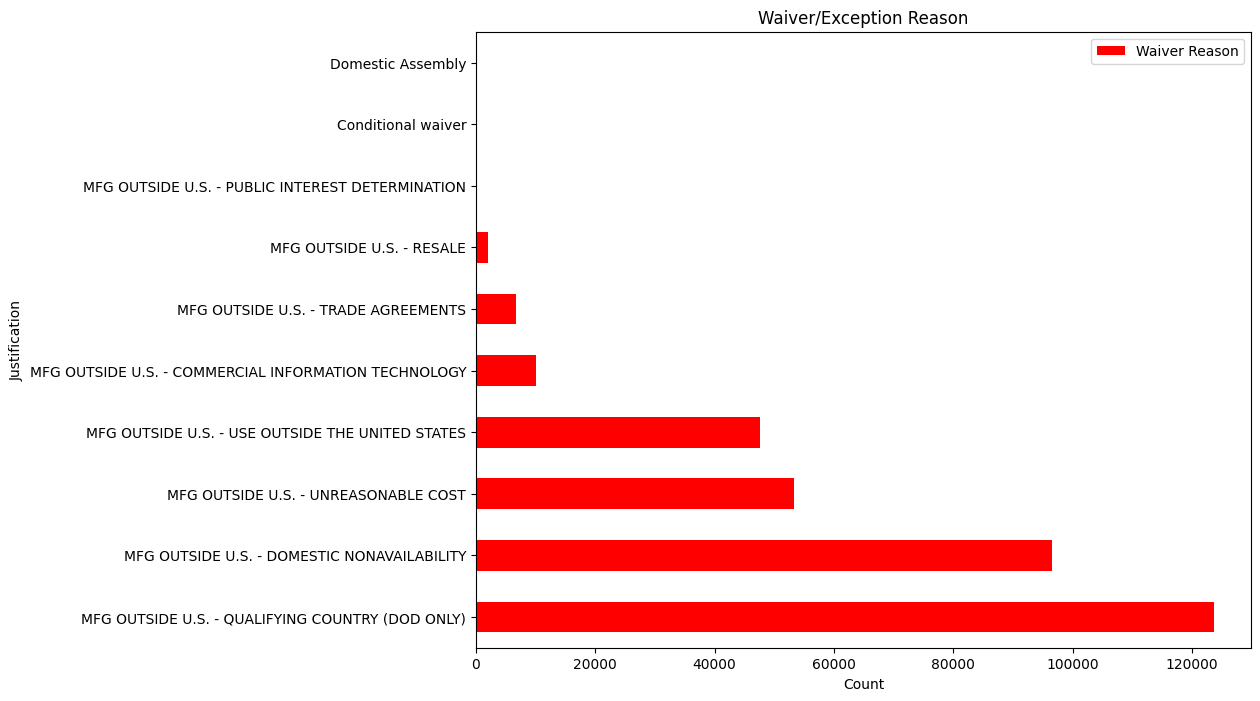

In [ ]:
# Increase the figure size
plt.figure(figsize=(10, 8))

# Plot the histogram and add a label for the legend
df['Justification'].value_counts().plot(kind='barh', color='red', label='Waiver Reason')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Justification')
plt.title('Waiver/Exception Reason')

# Rotate x labels if needed
#plt.xticks(rotation=45)

# Display the legend
plt.legend()

# Show the plot
plt.show()

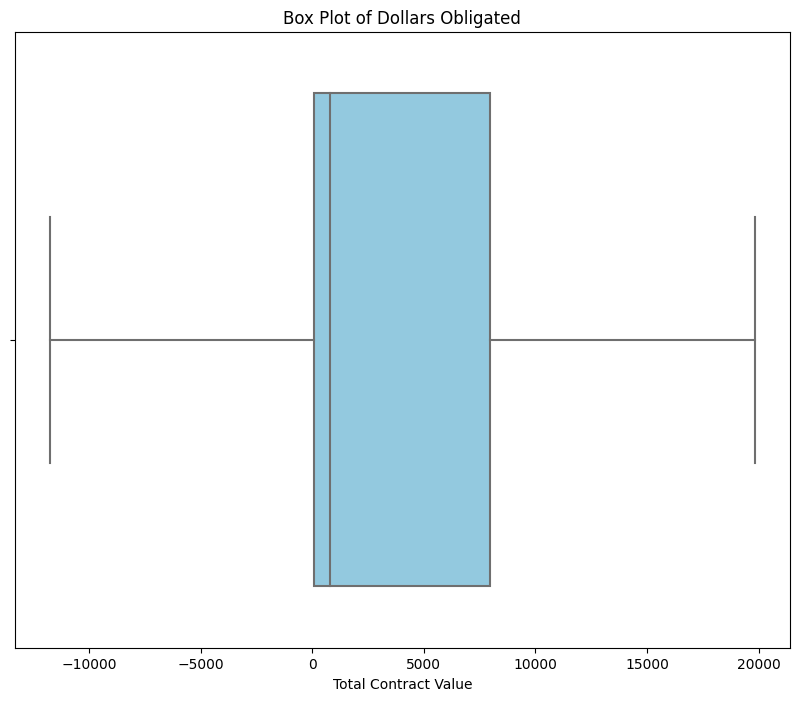

In [ ]:
plt.figure(figsize=(10, 8))  # Increase the size of the figure
sns.boxplot(x=df['Total Contract Value'], color='skyblue', showfliers=False)  # Use seaborn to create the box plot

plt.title('Box Plot of Dollars Obligated')  # Add a title to the plot
plt.xlabel('Total Contract Value')  # Label the x-axis

plt.show()  # Show the plot

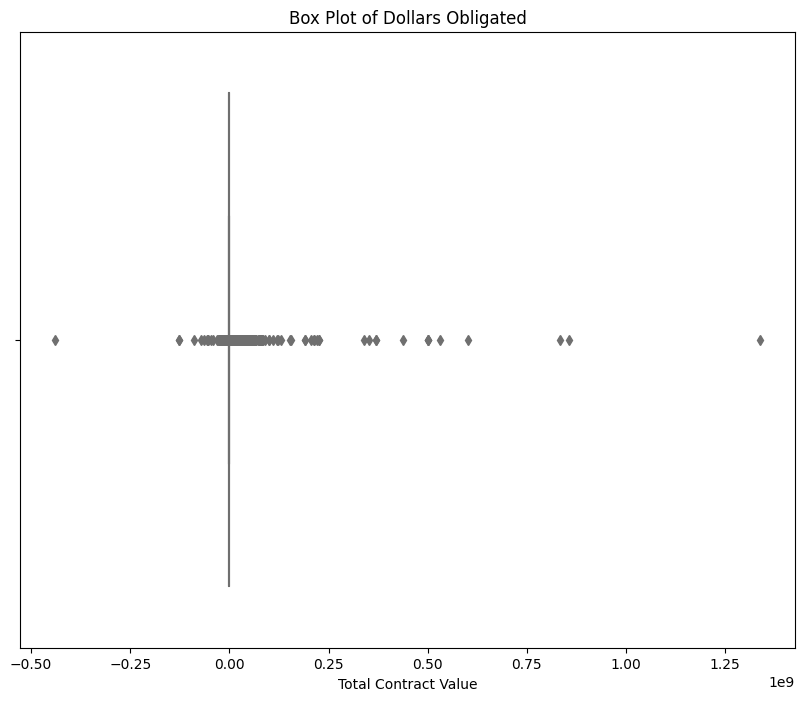

In [ ]:
plt.figure(figsize=(10, 8))  # Increase the size of the figure
sns.boxplot(x=df['Total Contract Value'], color='skyblue', showfliers=True)  # Use seaborn to create the box plot

plt.title('Box Plot of Dollars Obligated')  # Add a title to the plot
plt.xlabel('Total Contract Value')  # Label the x-axis

plt.show()  # Show the plot

<Axes: >

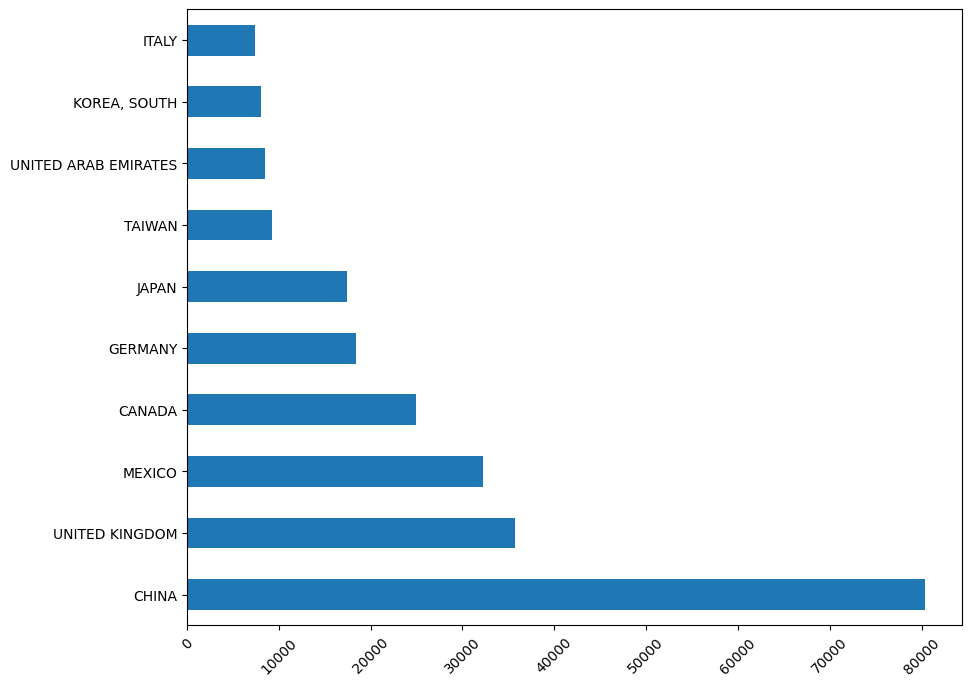

In [ ]:
top_countries = df['Country of Product or Service Origin'].value_counts().nlargest(10)
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
top_countries.plot(kind='barh')

<Axes: >

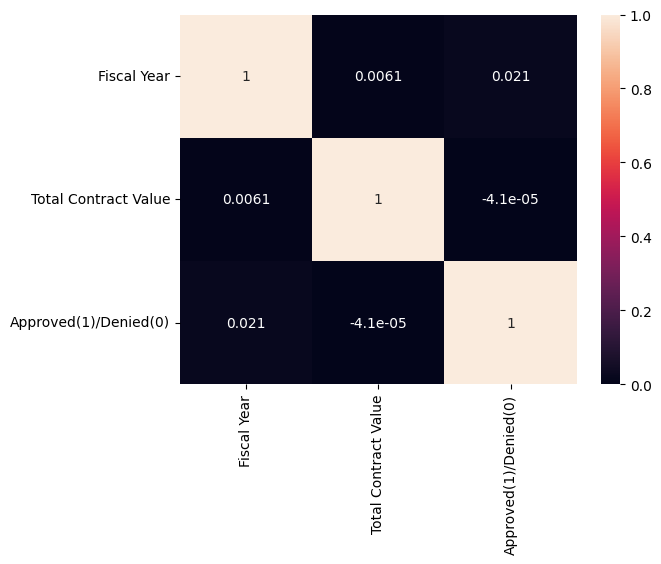

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

# Isolation Forest Model

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
df.head()

,Fiscal Year,Funding Agency Name,Funding Agency ID,Justification,Country of Product or Service Origin,Product or Service Code,Product or Service Code Description,Vendor Name,Vendor Address City,Vendor Address State Name,Vendor Address Country Name,Total Contract Value,PIID,Date Signed,Completion Date,NAICS Code,NAICS Description,Type of Contract (Desc),Award or IDV Type,Approved(1)/Denied(0)
0,2022,ADMINISTRATION FOR CHILDREN AND FAMILIES,7590,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,TAIWAN,7B21,IT AND TELECOM - COMPUTE: MAINFRAME (HARDWARE ...,"AGSI, LLC",LOVETTSVILLE,VIRGINIA,UNITED STATES,32995.00,75ACF122F80026,2022-09-16,2022-11-30,811212,COMPUTER AND OFFICE MACHINE REPAIR AND MAINTEN...,FIRM FIXED PRICE,DELIVERY ORDER,1
1,2020,ADMINISTRATION FOR CHILDREN AND FAMILIES,7590,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,GERMANY,6640,LABORATORY EQUIPMENT AND SUPPLIES,"CARL ZEISS MICROSCOPY, LLC",WHITE PLAINS,NEW YORK,UNITED STATES,278917.44,75N91020P00420,2020-08-26,2020-01-09,334516,ANALYTICAL LABORATORY INSTRUMENT MANUFACTURING,FIRM FIXED PRICE,PURCHASE ORDER,1
2,2023,AGENCY FOR INTERNATIONAL DEVELOPMENT,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,5975,ELECTRICAL HARDWARE AND SUPPLIES,"INTELLECTECHS, INC.",VIRGINIA BEACH,VIRGINIA,UNITED STATES,11081.25,72030623P00002,2023-11-03,2023-07-31,339940,OFFICE SUPPLIES (EXCEPT PAPER) MANUFACTURING,FIRM FIXED PRICE,PURCHASE ORDER,1
3,2023,AGENCY FOR INTERNATIONAL DEVELOPMENT,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,5975,ELECTRICAL HARDWARE AND SUPPLIES,"INTELLECTECHS, INC.",VIRGINIA BEACH,VIRGINIA,UNITED STATES,955.00,72030623P00002,2023-03-31,2023-07-31,339940,OFFICE SUPPLIES (EXCEPT PAPER) MANUFACTURING,FIRM FIXED PRICE,PURCHASE ORDER,1
4,2018,AGENCY FOR INTERNATIONAL DEVELOPMENT,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,ARMENIA,7030,INFORMATION TECHNOLOGY SOFTWARE,PRIOTIX LLC,YEREVAN,NaN,ARMENIA,0.00,72011118P00001,2018-09-26,2018-12-27,511210,SOFTWARE PUBLISHERS,FIRM FIXED PRICE,PURCHASE ORDER,1


In [ ]:
selected_columns=['Funding Agency Name', 'Product or Service Code','Justification','Country of Product or Service Origin','Approved(1)/Denied(0)'] #'Total Contract Value',
subset_df=df[selected_columns]

In [ ]:
subset_df.head(10)

,Funding Agency Name,Product or Service Code,Justification,Country of Product or Service Origin,Approved(1)/Denied(0)
0,ADMINISTRATION FOR CHILDREN AND FAMILIES,7B21,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,TAIWAN,1
1,ADMINISTRATION FOR CHILDREN AND FAMILIES,6640,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,GERMANY,1
2,AGENCY FOR INTERNATIONAL DEVELOPMENT,5975,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,1
3,AGENCY FOR INTERNATIONAL DEVELOPMENT,5975,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,1
4,AGENCY FOR INTERNATIONAL DEVELOPMENT,7030,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,ARMENIA,1
5,AGENCY FOR INTERNATIONAL DEVELOPMENT,7021,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,ARMENIA,1
6,AGENCY FOR INTERNATIONAL DEVELOPMENT,7042,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,BANGLADESH,1
7,AGENCY FOR INTERNATIONAL DEVELOPMENT,7042,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,BANGLADESH,1
8,AGENCY FOR INTERNATIONAL DEVELOPMENT,7042,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,BANGLADESH,1
9,AGENCY FOR INTERNATIONAL DEVELOPMENT,7042,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,BANGLADESH,1


In [ ]:
subset_df.describe()

,Approved(1)/Denied(0)
count,340075.000000
mean,0.999979
std,0.004537
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
print(subset_df.dtypes)

Funding Agency Name                     object
Product or Service Code                 object
Justification                           object
Country of Product or Service Origin    object
Approved(1)/Denied(0)                    int64
dtype: object


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340075 entries, 0 to 340074
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Fiscal Year                           340075 non-null  int64         
 1   Funding Agency Name                   340075 non-null  object        
 2   Funding Agency ID                     339259 non-null  object        
 3   Justification                         340075 non-null  object        
 4   Country of Product or Service Origin  340018 non-null  object        
 5   Product or Service Code               339977 non-null  object        
 6   Product or Service Code Description   340024 non-null  object        
 7   Vendor Name                           339961 non-null  object        
 8   Vendor Address City                   339964 non-null  object        
 9   Vendor Address State Name             213666 non-null  obje

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6)

# Specify categorical columns (if any)
cat_cols = ['Funding Agency Name', 'Country of Product or Service Origin','Justification']  # add other categorical columns if any



In [ ]:
import hashlib

def hash_string_to_float(s):
    # Generate MD5 hash of string
    m = hashlib.md5()
    m.update(s.encode('utf-8'))
    hashed = m.hexdigest()

    # Convert to int and then to float in range [0, 1]
    return int(hashed, 16) / float(0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF)

subset_df['Product or Service Code'] = subset_df['Product or Service Code'].astype(str).apply(hash_string_to_float)

In [ ]:
subset_df.head()

,Funding Agency Name,Product or Service Code,Justification,Country of Product or Service Origin,Approved(1)/Denied(0)
0,ADMINISTRATION FOR CHILDREN AND FAMILIES,0.266134,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,TAIWAN,1
1,ADMINISTRATION FOR CHILDREN AND FAMILIES,0.022038,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,GERMANY,1
2,AGENCY FOR INTERNATIONAL DEVELOPMENT,0.198484,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,1
3,AGENCY FOR INTERNATIONAL DEVELOPMENT,0.198484,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,1
4,AGENCY FOR INTERNATIONAL DEVELOPMENT,0.696710,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,ARMENIA,1


In [ ]:
filtered_df = subset_df[subset_df['Approved(1)/Denied(0)'] == 0]
#print(filtered_df)
filtered_df.head()

,Funding Agency Name,Product or Service Code,Justification,Country of Product or Service Origin,Approved(1)/Denied(0)
49,FEDERAL HIGHWAY ADMINISTRATION,0.288097,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,CHINA,0
23203,FEDERAL HIGHWAY ADMINISTRATION,0.841885,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,CHINA,0
23204,FEDERAL HIGHWAY ADMINISTRATION,0.305898,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,CHINA,0
23205,FEDERAL HIGHWAY ADMINISTRATION,0.819996,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,CHINA,0
23206,FEDERAL HIGHWAY ADMINISTRATION,0.654512,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,CHINA,0


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting data into training and test set (if not already split)
cols_to_drop=['Approved(1)/Denied(0)']
X = subset_df.drop(columns=cols_to_drop)
y = subset_df['Approved(1)/Denied(0)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer

# Impute the NaN values using the mean of the column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
from sklearn.utils import resample
from sklearn.utils import shuffle

# Separate the positive and negative samples
X_neg = X_train[y_train == 0]
y_neg = y_train[y_train == 0]

X_pos = X_train[y_train == 1]
y_pos = y_train[y_train == 1]

# Double or triple the negative samples
num_to_resample = len(X_neg) * 10 - len(X_neg)  # for double; use 3 for triple

# Use resample (from sklearn) to oversample the negative class
X_resampled_neg, y_resampled_neg = resample(X_neg, y_neg,
                                            replace=True,
                                            n_samples=num_to_resample,
                                            random_state=42)

# Concatenate the original positive class with the resampled negative class
X_pos = pd.DataFrame(X_pos)
X_resampled_neg = pd.DataFrame(X_resampled_neg)

X_resampled = pd.concat([X_pos, X_resampled_neg])

y_pos = pd.Series(y_pos)
y_resampled_neg = pd.Series(y_resampled_neg)
y_resampled = pd.concat([y_pos, y_resampled_neg])

# Shuffle the dataset after concatenation if required
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=7)

In [ ]:
y_train.value_counts()

1    191283
0        39
Name: Approved(1)/Denied(0), dtype: int64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191322 entries, 210 to 48453
Data columns (total 4 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Funding Agency Name                   191322 non-null  object 
 1   Product or Service Code               191322 non-null  float64
 2   Justification                         191322 non-null  object 
 3   Country of Product or Service Origin  191291 non-null  object 
dtypes: float64(1), object(3)
memory usage: 7.3+ MB


In [ ]:
X_train['Country of Product or Service Origin'].fillna('Unknown', inplace=True)
X_test['Country of Product or Service Origin'].fillna('Unknown', inplace=True)

In [ ]:
# Train the model
# Initialize CatBoost classifier
model = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, cat_features=cat_cols, verbose=200)

# Train the model
model.fit(X_train, y_train)
# Making predictions
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

0:	learn: 0.4886530	total: 607ms	remaining: 5m 2s
200:	learn: 0.0001484	total: 55.3s	remaining: 1m 22s
400:	learn: 0.0001428	total: 1m 47s	remaining: 26.6s
499:	learn: 0.0001428	total: 2m 11s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00     63768

    accuracy                           1.00     63774
   macro avg       1.00      1.00      1.00     63774
weighted avg       1.00      1.00      1.00     63774



In [ ]:
data_for_prediction = {
        'Funding Agency Name': ['FEDERAL HIGHWAY ADMINISTRATION'],
        'Product or Service Code': [0.288097],
        'Justification': ['MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY'],
        'Country of Product or Service Origin': ['CHINA']
    }
df_predict = pd.DataFrame(data_for_prediction)

# Make the prediction using the model
predicted_class = model.predict(df_predict)


In [ ]:
predicted_class[0]

0

In [ ]:
X_test[y_pred==0].head()

,Funding Agency Name,Product or Service Code,Justification,Country of Product or Service Origin
49,FEDERAL HIGHWAY ADMINISTRATION,0.288097,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,CHINA
49,FEDERAL HIGHWAY ADMINISTRATION,0.288097,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,CHINA
49,FEDERAL HIGHWAY ADMINISTRATION,0.288097,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,CHINA
49,FEDERAL HIGHWAY ADMINISTRATION,0.288097,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,CHINA
23207,FEDERAL HIGHWAY ADMINISTRATION,0.741263,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,CHINA


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[    6     0]
 [    0 63768]]


In [ ]:
y_test.value_counts()

1    63768
0        6
Name: Approved(1)/Denied(0), dtype: int64

In [ ]:
model.save_model("catboost_model.cbm")

In [ ]:
!pip install Flask

In [ ]:
from flask import Flask, request, jsonify
import pandas as pd

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from POST request
    data = request.get_json()

    # Convert data to DataFrame
    df = pd.DataFrame(data)

    # Predict using your CatBoost model
    predictions = model.predict(df)

    # Return predictions as JSON
    return jsonify(predictions.tolist())

# Run the Flask app
# Use the below line in Jupyter to run Flask. It's a workaround for Jupyter's way of running loops
app.run(port=5000, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


### One hot encoding of Funding Agency Name

In [ ]:
df_dummy = pd.get_dummies(subset_df, columns=['Funding Agency Name'], drop_first=True)
# onehot_encoder = OneHotEncoder(drop='first')
# onehot_features = onehot_encoder.fit_transform(df_dummy[['Funding Agency Name']])
# onehot_columns = onehot_encoder.get_feature_names_out(['Funding Agency Name'])

# # Convert to DataFrame
# onehot_df = pd.DataFrame(onehot_features.toarray(), columns=onehot_columns, index=df.index)

# # Concatenate with the original DataFrame
# df = pd.concat([df.drop('Funding Agency Name', axis=1), onehot_df], axis=1)

In [ ]:
df_dummy.head()

,Product or Service Code,Justification,Country of Product or Service Origin,Total Contract Value,Approved(1)/Denied(0),Funding Agency Name_AGENCY FOR INTERNATIONAL DEVELOPMENT,Funding Agency Name_AGRICULTURAL MARKETING SERVICE,Funding Agency Name_AGRICULTURAL RESEARCH SERVICE,Funding Agency Name_ALCOHOL AND TOBACCO TAX AND TRADE BUREAU,Funding Agency Name_ANIMAL AND PLANT HEALTH INSPECTION SERVICE,...,Funding Agency Name_US CENSUS BUREAU,Funding Agency Name_US GEOLOGICAL SURVEY,Funding Agency Name_US PATENT AND TRADEMARK OFFICE,"Funding Agency Name_USDA, DEPARTMENTAL ADMINISTRATION","Funding Agency Name_USDA, OFFICE OF GENERAL COUNSEL","Funding Agency Name_USDA, OFFICE OF OPERATIONS","Funding Agency Name_USDA, OFFICE OF THE CHIEF FINANCIAL OFFICER","Funding Agency Name_USDA, OFFICE OF THE CHIEF INFORMATION OFFICER","Funding Agency Name_VETERANS AFFAIRS, DEPARTMENT OF",Funding Agency Name_WASHINGTON HEADQUARTERS SERVICES (WHS)
0,7B21,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,TAIWAN,32995.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6640,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,GERMANY,278917.44,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5975,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,11081.25,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5975,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,955.00,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7030,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,ARMENIA,0.00,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
onehot_encoder = OneHotEncoder(drop='first')
onehot_features = onehot_encoder.fit_transform(subset_df[['Funding Agency Name']])
onehot_columns = onehot_encoder.get_feature_names_out(['Funding Agency Name'])

# Convert to DataFrame
onehot_df = pd.DataFrame(onehot_features.toarray(), columns=onehot_columns, index=subset_df.index)

# Concatenate with the original DataFrame
subset_df = pd.concat([subset_df.drop('Funding Agency Name', axis=1), onehot_df], axis=1)

In [ ]:
subset_df.head()

,Product or Service Code,Justification,Country of Product or Service Origin,Approved(1)/Denied(0),Funding Agency Name_AGENCY FOR INTERNATIONAL DEVELOPMENT,Funding Agency Name_AGRICULTURAL MARKETING SERVICE,Funding Agency Name_AGRICULTURAL RESEARCH SERVICE,Funding Agency Name_ALCOHOL AND TOBACCO TAX AND TRADE BUREAU,Funding Agency Name_ANIMAL AND PLANT HEALTH INSPECTION SERVICE,Funding Agency Name_ARMED FORCES RETIREMENT HOME,...,Funding Agency Name_US CENSUS BUREAU,Funding Agency Name_US GEOLOGICAL SURVEY,Funding Agency Name_US PATENT AND TRADEMARK OFFICE,"Funding Agency Name_USDA, DEPARTMENTAL ADMINISTRATION","Funding Agency Name_USDA, OFFICE OF GENERAL COUNSEL","Funding Agency Name_USDA, OFFICE OF OPERATIONS","Funding Agency Name_USDA, OFFICE OF THE CHIEF FINANCIAL OFFICER","Funding Agency Name_USDA, OFFICE OF THE CHIEF INFORMATION OFFICER","Funding Agency Name_VETERANS AFFAIRS, DEPARTMENT OF",Funding Agency Name_WASHINGTON HEADQUARTERS SERVICES (WHS)
0,7B21,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,TAIWAN,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6640,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,GERMANY,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5975,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5975,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,AFGHANISTAN,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7030,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,ARMENIA,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Ordinal Encoding of Country of Product or Service Origin

In [ ]:
ordinal_encoder = OrdinalEncoder()
subset_df['Country of Product or Service Origin'] = ordinal_encoder.fit_transform(subset_df[['Country of Product or Service Origin']])

In [ ]:
subset_df['Justification'] = ordinal_encoder.fit_transform(subset_df[['Justification']])

In [ ]:
subset_df['Approved(1)/Denied(0)'].value_counts()

1    340068
0         7
Name: Approved(1)/Denied(0), dtype: int64

In [ ]:
subset_df.dtypes

Product or Service Code                                               object
Justification                                                        float64
Country of Product or Service Origin                                 float64
Approved(1)/Denied(0)                                                  int64
Funding Agency Name_AGENCY FOR INTERNATIONAL DEVELOPMENT             float64
                                                                      ...   
Funding Agency Name_USDA, OFFICE OF OPERATIONS                       float64
Funding Agency Name_USDA, OFFICE OF THE CHIEF FINANCIAL OFFICER      float64
Funding Agency Name_USDA, OFFICE OF THE CHIEF INFORMATION OFFICER    float64
Funding Agency Name_VETERANS AFFAIRS, DEPARTMENT OF                  float64
Funding Agency Name_WASHINGTON HEADQUARTERS SERVICES (WHS)           float64
Length: 188, dtype: object

In [ ]:
subset_df.describe()

,Justification,Country of Product or Service Origin,Approved(1)/Denied(0),Funding Agency Name_AGENCY FOR INTERNATIONAL DEVELOPMENT,Funding Agency Name_AGRICULTURAL MARKETING SERVICE,Funding Agency Name_AGRICULTURAL RESEARCH SERVICE,Funding Agency Name_ALCOHOL AND TOBACCO TAX AND TRADE BUREAU,Funding Agency Name_ANIMAL AND PLANT HEALTH INSPECTION SERVICE,Funding Agency Name_ARMED FORCES RETIREMENT HOME,Funding Agency Name_ARMY/AIR FORCE EXCHANGE SERVICE,...,Funding Agency Name_US CENSUS BUREAU,Funding Agency Name_US GEOLOGICAL SURVEY,Funding Agency Name_US PATENT AND TRADEMARK OFFICE,"Funding Agency Name_USDA, DEPARTMENTAL ADMINISTRATION","Funding Agency Name_USDA, OFFICE OF GENERAL COUNSEL","Funding Agency Name_USDA, OFFICE OF OPERATIONS","Funding Agency Name_USDA, OFFICE OF THE CHIEF FINANCIAL OFFICER","Funding Agency Name_USDA, OFFICE OF THE CHIEF INFORMATION OFFICER","Funding Agency Name_VETERANS AFFAIRS, DEPARTMENT OF",Funding Agency Name_WASHINGTON HEADQUARTERS SERVICES (WHS)
count,340075.000000,340018.000000,340075.000000,340075.000000,340075.000000,340075.000000,340075.000000,340075.000000,340075.000000,340075.000000,...,340075.000000,340075.000000,340075.000000,340075.000000,340075.000000,340075.000000,340075.000000,340075.000000,340075.000000,340075.000000
mean,5.418934,100.853799,0.999979,0.000662,0.000018,0.000694,0.000035,0.000512,0.000012,0.000006,...,0.000056,0.001829,0.000065,0.000012,0.000006,0.000003,0.000006,0.000068,0.004226,0.000068
std,2.227390,61.915711,0.004537,0.025713,0.004200,0.026334,0.005940,0.022614,0.003430,0.002425,...,0.007474,0.042728,0.008043,0.003430,0.002425,0.001715,0.002425,0.008224,0.064867,0.008224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,95.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,159.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,207.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Oversampling the negative data

In [ ]:
pip install imbalanced-learn


In [ ]:
subset_df['Product or Service Code'] = subset_df['Product or Service Code'].astype(str)


In [ ]:
import hashlib

def hash_string_to_float(s):
    # Generate MD5 hash of string
    m = hashlib.md5()
    m.update(s.encode('utf-8'))
    hashed = m.hexdigest()

    # Convert to int and then to float in range [0, 1]
    return int(hashed, 16) / float(0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF)

subset_df['Product or Service Code'] = subset_df['Product or Service Code'].astype(str).apply(hash_string_to_float)

In [ ]:
subset_df.head()

,Product or Service Code,Justification,Country of Product or Service Origin,Approved(1)/Denied(0),Funding Agency Name_AGENCY FOR INTERNATIONAL DEVELOPMENT,Funding Agency Name_AGRICULTURAL MARKETING SERVICE,Funding Agency Name_AGRICULTURAL RESEARCH SERVICE,Funding Agency Name_ALCOHOL AND TOBACCO TAX AND TRADE BUREAU,Funding Agency Name_ANIMAL AND PLANT HEALTH INSPECTION SERVICE,Funding Agency Name_ARMED FORCES RETIREMENT HOME,...,Funding Agency Name_US CENSUS BUREAU,Funding Agency Name_US GEOLOGICAL SURVEY,Funding Agency Name_US PATENT AND TRADEMARK OFFICE,"Funding Agency Name_USDA, DEPARTMENTAL ADMINISTRATION","Funding Agency Name_USDA, OFFICE OF GENERAL COUNSEL","Funding Agency Name_USDA, OFFICE OF OPERATIONS","Funding Agency Name_USDA, OFFICE OF THE CHIEF FINANCIAL OFFICER","Funding Agency Name_USDA, OFFICE OF THE CHIEF INFORMATION OFFICER","Funding Agency Name_VETERANS AFFAIRS, DEPARTMENT OF",Funding Agency Name_WASHINGTON HEADQUARTERS SERVICES (WHS)
0,0.266134,2.0,184.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.022038,3.0,78.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.198484,2.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.198484,2.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.696710,2.0,8.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
subset = subset_df[df['Approved(1)/Denied(0)'] == 0]
print(subset)

In [ ]:
subset.head(10)

,Product or Service Code,Justification,Country of Product or Service Origin,Approved(1)/Denied(0),Funding Agency Name_AGENCY FOR INTERNATIONAL DEVELOPMENT,Funding Agency Name_AGRICULTURAL MARKETING SERVICE,Funding Agency Name_AGRICULTURAL RESEARCH SERVICE,Funding Agency Name_ALCOHOL AND TOBACCO TAX AND TRADE BUREAU,Funding Agency Name_ANIMAL AND PLANT HEALTH INSPECTION SERVICE,Funding Agency Name_ARMED FORCES RETIREMENT HOME,...,Funding Agency Name_US CENSUS BUREAU,Funding Agency Name_US GEOLOGICAL SURVEY,Funding Agency Name_US PATENT AND TRADEMARK OFFICE,"Funding Agency Name_USDA, DEPARTMENTAL ADMINISTRATION","Funding Agency Name_USDA, OFFICE OF GENERAL COUNSEL","Funding Agency Name_USDA, OFFICE OF OPERATIONS","Funding Agency Name_USDA, OFFICE OF THE CHIEF FINANCIAL OFFICER","Funding Agency Name_USDA, OFFICE OF THE CHIEF INFORMATION OFFICER","Funding Agency Name_VETERANS AFFAIRS, DEPARTMENT OF",Funding Agency Name_WASHINGTON HEADQUARTERS SERVICES (WHS)
316915,0.288097,3.0,198.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
340069,0.841885,3.0,198.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
340070,0.305898,3.0,198.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
340071,0.819996,3.0,198.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
340072,0.654512,3.0,198.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
340073,0.741263,3.0,198.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
340074,0.654512,3.0,198.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
subset_original = df[df['Approved(1)/Denied(0)'] == 0]


In [ ]:
subset_original.head(10)

,Fiscal Year,Funding Agency Name,Funding Agency ID,Justification,Country of Product or Service Origin,Product or Service Code,Product or Service Code Description,Vendor Name,Vendor Address City,Vendor Address State Name,Vendor Address Country Name,Total Contract Value,PIID,Date Signed,Completion Date,NAICS Code,NAICS Description,Type of Contract (Desc),Award or IDV Type,Approved(1)/Denied(0)
316915,2017,FEDERAL HIGHWAY ADMINISTRATION,6925,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,UNITED STATES,2310,Vehicles and Equipment,NaN,NaN,California,UNITED STATES,NaN,NaN,2017-07-25,NaT,NaN,NaN,NaN,NaN,0
340069,2001,FEDERAL HIGHWAY ADMINISTRATION,6925,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,UNITED STATES,6145,"PPWS, Saddle, 75 mm High strength, S-wire",NaN,NaN,California,UNITED STATES,NaN,NaN,2001-08-09,NaT,NaN,NaN,NaN,NaN,0
340070,2017,FEDERAL HIGHWAY ADMINISTRATION,6925,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,UNITED STATES,9510,Cast-in-steel shell pile,NaN,NaN,California,UNITED STATES,4812.0,NaN,2002-03-06,NaT,NaN,NaN,NaN,NaN,0
340071,2017,FEDERAL HIGHWAY ADMINISTRATION,6925,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,UNITED STATES,9515,Steel sheet pile,NaN,NaN,New Hampshire,UNITED STATES,300000.0,NaN,2003-03-17,NaT,NaN,NaN,NaN,NaN,0
340072,2017,FEDERAL HIGHWAY ADMINISTRATION,6925,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,UNITED STATES,4710,Iron fittings,NaN,NaN,Louisiana,UNITED STATES,103650.0,NaN,2006-03-03,NaT,NaN,NaN,NaN,NaN,0
340073,2017,FEDERAL HIGHWAY ADMINISTRATION,6925,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,UNITED STATES,5445,Prefab. tower heads,NaN,NaN,Ohio,UNITED STATES,NaN,NaN,2007-02-28,NaT,NaN,NaN,NaN,NaN,0
340074,2017,FEDERAL HIGHWAY ADMINISTRATION,6925,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,UNITED STATES,4710,"16"" pipe piling (10,000 L-ft)",NaN,NaN,Minnesota,UNITED STATES,220800.0,NaN,2008-09-30,NaT,NaN,NaN,NaN,NaN,0


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting data into training and test set (if not already split)
cols_to_drop=['Approved(1)/Denied(0)']
X = subset_df.drop(columns=cols_to_drop)
y = subset_df['Approved(1)/Denied(0)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.impute import SimpleImputer

# Impute the NaN values using the mean of the column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
X_train_imputed.shape

(255056, 187)

In [ ]:
X_train.shape

(255056, 187)

In [ ]:
X_test.shape

(85019, 187)

In [ ]:
y_train.value_counts()

1    255051
0         5
Name: Approved(1)/Denied(0), dtype: int64

In [ ]:
y_train.shape

(255056,)

In [ ]:
y_test.value_counts()

1    85017
0        2
Name: Approved(1)/Denied(0), dtype: int64

In [ ]:
smote = SMOTE(random_state=42)
X_resampled_equal, y_resampled_equal = smote.fit_resample(X_train_imputed, y_train)

In [ ]:
from sklearn.utils import resample
from sklearn.utils import shuffle

# Separate the positive and negative samples
X_neg = X_train_imputed[y_train == 0]
y_neg = y_train[y_train == 0]

X_pos = X_train_imputed[y_train == 1]
y_pos = y_train[y_train == 1]

# Double or triple the negative samples
num_to_resample = len(X_neg) * 10 - len(X_neg)  # for double; use 3 for triple

# Use resample (from sklearn) to oversample the negative class
X_resampled_neg, y_resampled_neg = resample(X_neg, y_neg,
                                            replace=True,
                                            n_samples=num_to_resample,
                                            random_state=42)

# Concatenate the original positive class with the resampled negative class
X_pos = pd.DataFrame(X_pos)
X_resampled_neg = pd.DataFrame(X_resampled_neg)

X_resampled = pd.concat([X_pos, X_resampled_neg])

y_pos = pd.Series(y_pos)
y_resampled_neg = pd.Series(y_resampled_neg)
y_resampled = pd.concat([y_pos, y_resampled_neg])

# Shuffle the dataset after concatenation if required
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

In [ ]:
print(y_resampled.value_counts())

1    255051
0        45
Name: Approved(1)/Denied(0), dtype: int64


In [ ]:
print(y_resampled.value_counts())

# Generic Classification and Boosting Schemes

In [ ]:
# Create a function for the models
def candidate_models():

    ''' Creates a list of models to be trained

       Returns

           basedModels: A list of candidate models
    '''

    basedModels = []

    basedModels.append(('Logistic Regression'  , LogisticRegression()))

    basedModels.append(('Random Forest'  , RandomForestClassifier()))

    basedModels.append(('CatBoost'  , CatBClassifier()))

# Isolation Forest Model on over-sampled data:

In [ ]:
clf = IsolationForest(n_estimators=1000, contamination=0.0003, random_state=11)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=7)

In [ ]:
clf.fit(X_train)

IsolationForest(contamination=0.0003, n_estimators=1000, random_state=11)

In [ ]:
y_pred_test = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert 0 to -1 for the purpose of evaluation
y_test_adj = y_test.apply(lambda x: 1 if x == 1 else -1)
print(classification_report(y_test_adj, y_pred_test))
print(confusion_matrix(y_test_adj, y_pred_test))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         6
           1       1.00      1.00      1.00     63768

    accuracy                           1.00     63774
   macro avg       0.50      0.50      0.50     63774
weighted avg       1.00      1.00      1.00     63774

[[    0     6]
 [   20 63748]]


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

1    191283
0        39
Name: Approved(1)/Denied(0), dtype: int64
1    63768
0        6
Name: Approved(1)/Denied(0), dtype: int64


# One-Class SVM

In [ ]:
from sklearn.svm import OneClassSVM

# Initialize the One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', nu=0.0003, gamma=0.1) # linear, polynomial

# Fit to the resampled data
oc_svm.fit(X_train)

# Predict outliers on test data
y_pred_test = oc_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         6
           1       1.00      0.99      0.99     63768

    accuracy                           0.99     63774
   macro avg       0.33      0.33      0.33     63774
weighted avg       1.00      0.99      0.99     63774

[[    0     0     0]
 [    0     0     6]
 [  827     0 62941]]


In [ ]:
print(confusion_matrix(y_test_adj, y_pred_test))

[[    0     6]
 [  827 62941]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Assuming X_resampled, y_resampled are your training datasets
dtrain = xgb.DMatrix(X_train, label=y_train)

# Set up the parameters
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'binary:logistic'  # error evaluation for binary classification
}
num_round = 10  # the number of training iterations

# Training the model
bst = xgb.train(param, dtrain, num_round)

# Making predictions
dtest = xgb.DMatrix(X_test)
y_pred = bst.predict(dtest)
y_pred_binary = [1 if val > 0.5 else 0 for val in y_pred]

print(classification_report(y_test, y_pred_binary))


[03:34:30] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00     63768

    accuracy                           1.00     63774
   macro avg       0.93      1.00      0.96     63774
weighted avg       1.00      1.00      1.00     63774



In [ ]:
print(confusion_matrix(y_test, y_pred_binary))

[[    6     0]
 [    1 63767]]


In [ ]:
import numpy as np

unique, counts = np.unique(y_pred_binary, return_counts=True)
value_counts = dict(zip(unique, counts))

print(value_counts)

{0: 7, 1: 63767}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# 4. Creating the model
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)  # You can tune other parameters as needed

# 5. Training the model
rf_classifier.fit(X_train, y_train)

# 6. Making predictions
y_pred = rf_classifier.predict(X_test)

# 7. Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9999843196286888
Confusion Matrix:
[[    6     0]
 [    1 63767]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00     63768

    accuracy                           1.00     63774
   macro avg       0.93      1.00      0.96     63774
weighted avg       1.00      1.00      1.00     63774



In [ ]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         6
           1       1.00      1.00      1.00     63768

    accuracy                           1.00     63774
   macro avg       0.33      0.33      0.33     63774
weighted avg       1.00      1.00      1.00     63774

[[    0     0     0]
 [    0     0     6]
 [   19     0 63749]]


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 12.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6)

# Specify categorical columns (if any)
cat_cols = ['Funding Agency Name', 'Country of Product or Service Origin']  # add other categorical columns if any

# Train the model
model.fit(X_train, y_train, cat_features=cat_cols, verbose=100)

# Making predictions
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


ValueError: ignored

# Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
# The 'novelty' parameter should be set to True if you want to use LOF for novelty detection
# (i.e., predict on new unseen data). By default, it's set to False for outlier detection.
lof = LocalOutlierFactor(n_neighbors=7, novelty=True, contamination=0.0005)
lof.fit(X_train)

LocalOutlierFactor(contamination=0.0005, n_neighbors=7, novelty=True)

In [ ]:
# For prediction, -1 indicates an outlier and 1 indicates an inlier.
y_pred = lof.predict(X_test)

In [ ]:
y_pred_binary = [0 if x == -1 else 1 for x in y_pred]

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Confusion Matrix:
[[    0     6]
 [   34 63734]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      1.00      1.00     63768

    accuracy                           1.00     63774
   macro avg       0.50      0.50      0.50     63774
weighted avg       1.00      1.00      1.00     63774



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# 20, 0.0003
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Confusion Matrix:
[[    0     6]
 [   20 63748]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      1.00      1.00     63768

    accuracy                           1.00     63774
   macro avg       0.50      0.50      0.50     63774
weighted avg       1.00      1.00      1.00     63774



# K-means

In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit to the resampled data
kmeans.fit(X_train)

# Predict outliers based on distance to centroids
distances = kmeans.transform(X_test)
y_pred_test = [1 if min(dist) < 20 else -1 for dist in distances]
# Note: You would need to define an appropriate threshold based on domain knowledge or validation.


In [ ]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         6
           1       1.00      0.95      0.97     63768

    accuracy                           0.95     63774
   macro avg       0.33      0.32      0.32     63774
weighted avg       1.00      0.95      0.97     63774

[[    0     0     0]
 [    0     0     6]
 [ 3453     0 60315]]


In [ ]:
print(y_resampled.value_counts())

1    255050
0    255050
Name: Approved(1)/Denied(0), dtype: int64


In [ ]:
print(y.value_counts())

1    340068
0         8
Name: Approved(1)/Denied(0), dtype: int64


In [ ]:
X.head()

,Fiscal Year,Funding Agency ID,Justification,Country of Product or Service Origin,Product or Service Code Description,Vendor Name,Vendor Address City,Vendor Address State Name,Vendor Address Country Name,Total Contract Value,...,Funding Agency Name_UNITED STATES MINT,Funding Agency Name_US CENSUS BUREAU,Funding Agency Name_US GEOLOGICAL SURVEY,Funding Agency Name_US PATENT AND TRADEMARK OFFICE,"Funding Agency Name_USDA, DEPARTMENTAL ADMINISTRATION","Funding Agency Name_USDA, OFFICE OF GENERAL COUNSEL","Funding Agency Name_USDA, OFFICE OF THE CHIEF FINANCIAL OFFICER","Funding Agency Name_USDA, OFFICE OF THE CHIEF INFORMATION OFFICER","Funding Agency Name_VETERANS AFFAIRS, DEPARTMENT OF",Funding Agency Name_WASHINGTON HEADQUARTERS SERVICES (WHS)
0,2022,7590,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,160.0,IT AND TELECOM - COMPUTE: MAINFRAME (HARDWARE ...,"AGSI, LLC",LOVETTSVILLE,VIRGINIA,UNITED STATES,32995.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,7590,MFG OUTSIDE U.S. - DOMESTIC NONAVAILABILITY,68.0,LABORATORY EQUIPMENT AND SUPPLIES,"CARL ZEISS MICROSCOPY, LLC",WHITE PLAINS,NEW YORK,UNITED STATES,278917.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,0.0,ELECTRICAL HARDWARE AND SUPPLIES,"INTELLECTECHS, INC.",VIRGINIA BEACH,VIRGINIA,UNITED STATES,11081.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,0.0,ELECTRICAL HARDWARE AND SUPPLIES,"INTELLECTECHS, INC.",VIRGINIA BEACH,VIRGINIA,UNITED STATES,955.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2018,7200,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,7.0,INFORMATION TECHNOLOGY CENTRAL PROCESSING UNIT...,MISCELLANEOUS FOREIGN AWARDEES,WASHINGTON,DISTRICT OF COLUMBIA,UNITED STATES,22225.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.001),random_state=random_state)

model.fit(df[['Approved(1)/Denied(0)']])

print(model.get_params())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


{'bootstrap': False, 'contamination': 0.001, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7D3668AB9B40, 'verbose': 0, 'warm_start': False}
